**<h1 align="center">Sales Forecasting</h1>**
**<h1 align="center">Siemens</h1>**

**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

* [1. Data Exploration](#chapter1)
    * [1.1. Imports](#sub-section-1_1)
    * [1.2. Loading Data](#sub-section-1_2)
    * [1.3. Sales Data](#sub-section-1_3)
        * [1.3.1. Initial Analysis](#sub-section-1_3_1)



        
        * [1.3.2. Missing Values](#sub-section-1_3_2)
        * [1.3.3. Duplicates](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)
    * [1.4. Individual Variable Analysis](#sub-section-1_4)
        * [1.4.1. Numerical Variables](#sub-section-1_4_1)
            * [1.4.1.1. Overview](#sub-section-1_4_1_1)
        * [1.4.2. Categorical Variables](#sub-section-1_4_2)
        * [1.4.3. Binary Variables](#sub-section-1_4_3)


        * [1.3.1. Types](#sub-section-1_3_1)
        * [1.3.2. Missing Values](#sub-section-1_3_2)
        * [1.3.3. Duplicates](#sub-section-1_3_3)
        * [1.3.4. Data Statistics](#sub-section-1_3_4)

<a class="anchor" id="chapter1"></a>

# 1. Data Exploration

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Force normal decimal formatting
pd.options.display.float_format = '{:.4f}'.format

In [15]:
# Visualisations 
sns.set_style("white")
siemens_green = '#009999'
siemens_colors = ['#009999', '#006666', '#00CCCC']

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Loading Data

</a>

In [16]:
# Import xlsx dataset into pandas dataframe
market_data = pd.read_excel('../Data/Case2_Market data.xlsx', header=[0,1,2])

# Import csv dataset into pandas dataframe
sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=";")

<a class="anchor" id="sub-section-1_3"></a>

## 1.3. Sales Data

</a>

<a class="anchor" id="sub-section-1_3_1"></a>

### 1.3.1. Initial Analysis

</a>

In [17]:
print(f'Sales data shape: {sales_data.shape}')
sales_data.sample(5)

Sales data shape: (9802, 3)


,DATE,Mapped_GCK,Sales_EUR
4645,19.11.2020,#1,0
5852,31.05.2021,#1,"482180,04"
1239,25.03.2019,#3,0
124,15.11.2018,#1,0
4040,17.03.2021,#16,"4068,8"


In [18]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


Before using this dataset effectively, the variables need to be adjusted to the correct data types. 
- DATE to date data type
- Mapped_GCK leave as?
- Sales_EUR to float

In [19]:
# DUPLICATES
sales_data[sales_data.duplicated() == True]

,DATE,Mapped_GCK,Sales_EUR


In [20]:
# MISSING VALUES
missing_values = sales_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [21]:
# STATISTICS
sales_data.describe(include='all')

,DATE,Mapped_GCK,Sales_EUR
count,9802,9802,9802
unique,1216,14,2609
top,16.04.2021,#1,0
freq,14,1179,7134


<a class="anchor" id="sub-section-1_3_2"></a>

### 1.3.2. Converting Data Types

</a>

In [22]:
# Turn into string, replace commas with periods, and remove leading/trailing whitespaces
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].astype(str).str.replace(',', '.').str.strip()

# Convert to float
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'])

In [23]:
# Convert the DATE column to datetime
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'], format='%d.%m.%Y')

In [24]:
# CHECK
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.9+ KB


<a class="anchor" id="sub-section-1_3_3"></a>

### 1.3.3. Exploratory Data Analysis

</a>

<a class="anchor" id="sub-section-1_3_3_1"></a>

#### 1.3.3.1. Sales Frequency

</a>

Although the term "sales volume" might suggest actual sales figures, in this dataset it might refer to the frequency of product appearances, not the number of units sold.
- The dataset contains 14 unique products.
- Product #1 appears most frequently, with 1,179 occurrences in the dataset.

In [25]:
print(f'Unique values in Mapped_GCK: {sales_data["Mapped_GCK"].nunique()}')

Unique values in Mapped_GCK: 14


In [26]:
# Check the distribution of the products by sales volume
sales_data['Mapped_GCK'].value_counts().sort_values(ascending=False)

Mapped_GCK
#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: count, dtype: int64

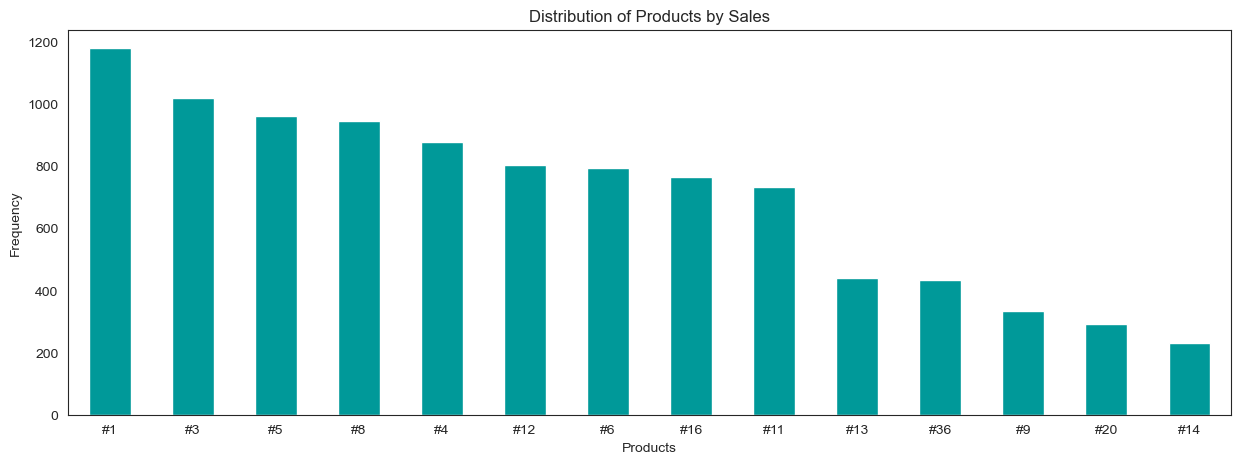

In [27]:
# Plot the distribution of the products by sales volume
plt.figure(figsize=(15, 5))
sales_data['Mapped_GCK'].value_counts().plot(kind='bar', color=siemens_green)
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.title('Distribution of Products by Sales')
plt.xticks(rotation=0)
plt.show()

<a class="anchor" id="sub-section-1_3_3_2"></a>

#### 1.3.3.2. Sales Revenue

</a>

- The total revenue is 2673845300.67 EUR.
- The dataset is highly imbalanced in terms of sales, with the top 3 products accounting for 93.77% of the total revenue.
- There are 276 cases of negative sales.

In [31]:
# Check total revenue per product
rev_product = sales_data.groupby('Mapped_GCK')['Sales_EUR'].sum()
rev_product.sort_values(ascending=False)

Mapped_GCK
#1    1544205996.7600
#3     533443487.7000
#5     429595158.0100
#11     65901314.6500
#8      34871219.8200
#6      20641890.4900
#16     18391175.7100
#4      15627204.9600
#12      8279486.3200
#13      1009156.9100
#36       998613.9100
#14       493822.0600
#9        308446.5100
#20        78326.8600
Name: Sales_EUR, dtype: float64

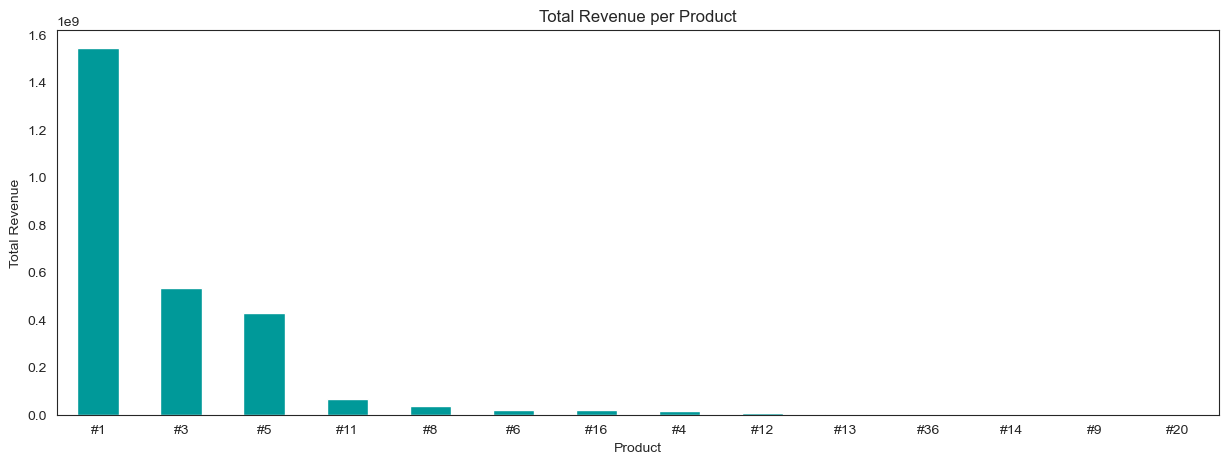

In [32]:
# Make a bar plot of total revenue per product
plt.figure(figsize=(15, 5))
rev_product.sort_values(ascending=False).plot(kind='bar', color=siemens_green)
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product')
plt.xticks(rotation=0)
plt.show()

In [33]:
# Verify what is the percetange of the total revenue generated by the top 3 products
top3_revenue = sales_data.groupby('Mapped_GCK')['Sales_EUR'].sum().sort_values(ascending=False).head(3).sum()
total_revenue = sales_data['Sales_EUR'].sum()
top3_revenue_percent = (top3_revenue / total_revenue) * 100
print(f'The total revenue is {total_revenue:.2f} EUR.')
print(f'The top 3 products account for {top3_revenue_percent:.2f}% of the total revenue.')

The total revenue is 2673845300.67 EUR.
The top 3 products account for 93.77% of the total revenue.


In [47]:
# Check negative values
print(f'There are {len(sales_data[sales_data["Sales_EUR"] < 0])} cases of negative sales.')

There are 276 cases of negative sales.


<a class="anchor" id="sub-section-1_3_3_3"></a>

#### 1.3.3.3. Seasonality

</a>

In [ ]:
print('Oldest date in Sales Data:', sales_data['DATE'].min())
print('Newest date in Sales Data:', sales_data['DATE'].max())

Oldest date in Sales Data: 2018-10-01 00:00:00
Newest date in Sales Data: 2022-04-30 00:00:00


In [ ]:
# Add columns for Month and Year
sales_data['Month'] = sales_data['DATE'].dt.month
sales_data['Year'] = sales_data['DATE'].dt.year

The data points to notable month-to-month and year-to-year fluctuations in both sales frequency and revenue. In terms of monthly performance, **March records the highest number of sales at 969**, generating 264,695,388.51 EUR in revenue, while **May sees the lowest sales frequency at 666**, bringing in 181,965,399.97 EUR. On average, monthly sales frequency stands at 816.83, with mean monthly revenue at 222,820,441.72 EUR.

Annually, **2020 leads in overall sales frequency** at 2,779, whereas **2021 posts the highest revenue** at 773,208,458.97 EUR. In contrast, 2018 lags behind with the fewest total sales (639) and the smallest revenue (141,544,018.09 EUR). Across all years, the average annual revenue is 534,769,060.13 EUR.

These patterns underline the importance of monitoring demand cycles—both seasonally and annually—to inform production planning, inventory management, and overall business strategy.

***Frequency of sales by month***
- Sales drop during summer
- Highest frequency month: 3 with 969 sales
- Lowest frequency month: 5 with 666 sales
- Average frequency of sales per month: 816.83

In [34]:
# Check the sales distribution per month
sales_data['Month'].value_counts()

Month
3     969
10    932
11    925
1     900
2     872
4     859
12    823
9     740
7     733
6     693
8     690
5     666
Name: count, dtype: int64

In [35]:
print(f'The month with the highest frequency of sales is {sales_data["Month"].value_counts().idxmax()}, with {sales_data["Month"].value_counts().max()} sales.')
print(f'The month with the lowest frequency of sales is {sales_data["Month"].value_counts().idxmin()}, with {sales_data["Month"].value_counts().min()} sales.')
print(f'The average frequency of sales per month is {sales_data["Month"].value_counts().mean():.2f}.')

The month with the highest frequency of sales is 3, with 969 sales.
The month with the lowest frequency of sales is 5, with 666 sales.
The average frequency of sales per month is 816.83.


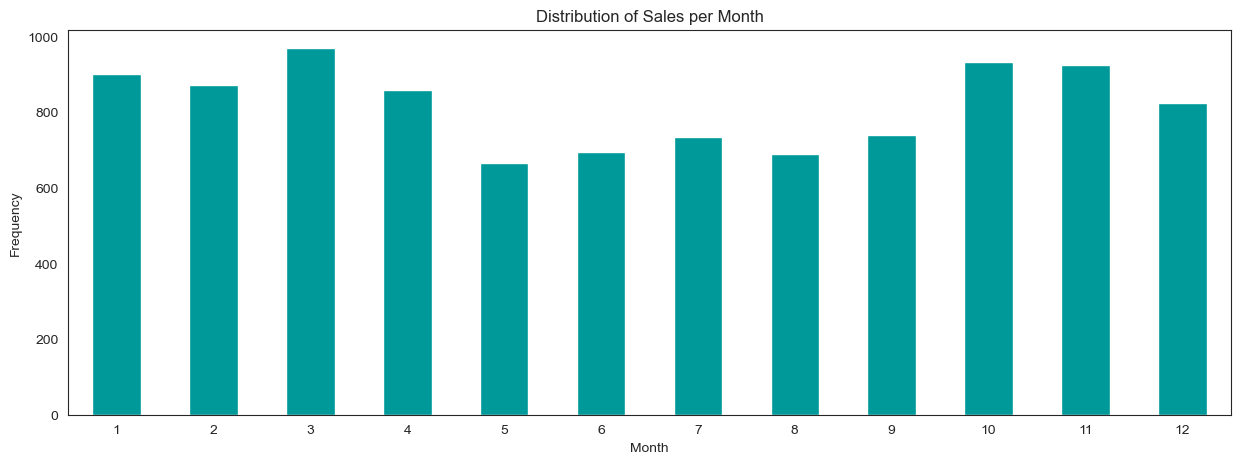

In [42]:
# plot the distribution of the sales per month
plt.figure(figsize=(15, 5))
sales_data['Month'].value_counts().sort_index().plot(kind='bar', color=siemens_green)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Sales per Month')
plt.xticks(rotation=0)
plt.show()

***Frequency of sales by year***
- Highest frequency year: 2020 with 2779 sales
- Lowest frequency year: 2018 with 639 sales (only have 10 months in 2018)
- Average frequency of sales per year: 1960.40

In [38]:
# Check the sales distribution per year
sales_data['Year'].value_counts()

Year
2020    2779
2021    2762
2019    2727
2022     895
2018     639
Name: count, dtype: int64

In [39]:
print(f'The year with the highest frequency of sales is {sales_data["Year"].value_counts().idxmax()}, with {sales_data["Year"].value_counts().max()} sales.')
print(f'The year with the lowest frequency of sales is {sales_data["Year"].value_counts().idxmin()}, with {sales_data["Year"].value_counts().min()} sales.')
print(f'The average frequency of sales per year is {sales_data["Year"].value_counts().mean():.2f}.')

The year with the highest frequency of sales is 2020, with 2779 sales.
The year with the lowest frequency of sales is 2018, with 639 sales.
The average frequency of sales per year is 1960.40.


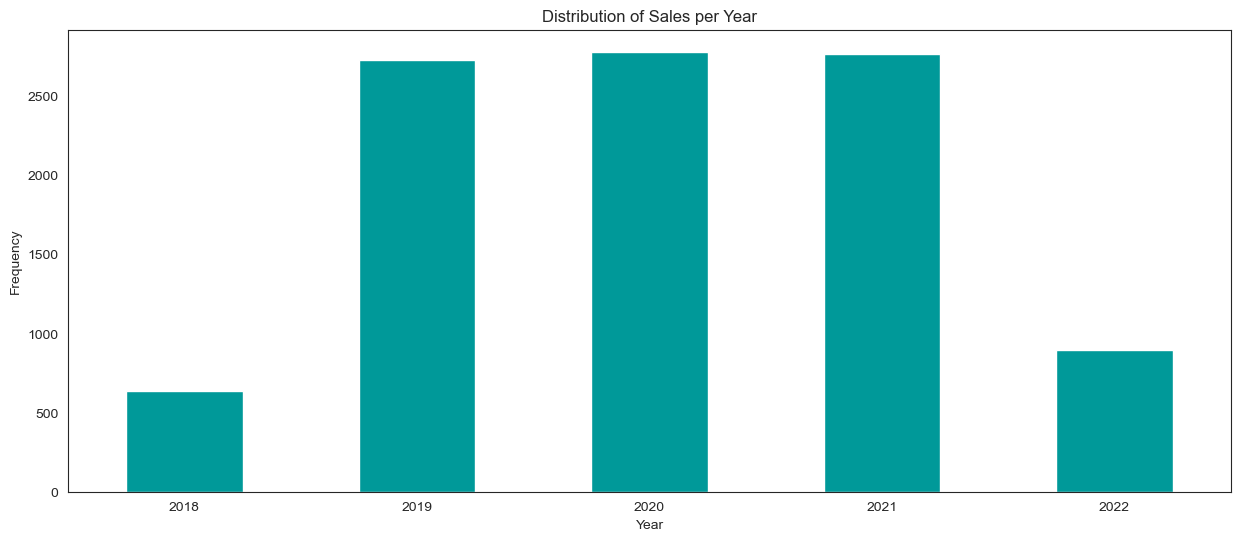

In [41]:
# plot the distribution of the sales per year
plt.figure(figsize=(15, 6))
sales_data['Year'].value_counts().sort_index().plot(kind='bar', color=siemens_green)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Sales per Year')
plt.xticks(rotation=0)
plt.show()

***Revenue by month***
- Revenue drops during summer.
- Highest revenue month: 3 with 264695388.51 EUR
- Lowest revenue month: 5 with 181965399.97 EUR
- Average revenue per month: 222820441.72 EUR

In [43]:
# check the revenue distribution per month
sales_data.groupby('Month')['Sales_EUR'].sum()

Month
1    201590801.0700
2    248945553.3100
3    264695388.5100
4    252267661.8200
5    181965399.9700
6    195766009.8500
7    186480261.1500
8    199085856.7600
9    230235562.0500
10   242265376.9900
11   225357428.5400
12   245190000.6500
Name: Sales_EUR, dtype: float64

In [44]:
print(f'The month with the highest revenue is {sales_data.groupby("Month")["Sales_EUR"].sum().idxmax()}, with {sales_data.groupby("Month")["Sales_EUR"].sum().max():.2f} EUR.')
print(f'The month with the lowest revenue is {sales_data.groupby("Month")["Sales_EUR"].sum().idxmin()}, with {sales_data.groupby("Month")["Sales_EUR"].sum().min():.2f} EUR.')
print(f'The average revenue per month is {sales_data.groupby("Month")["Sales_EUR"].sum().mean():.2f} EUR.')

The month with the highest revenue is 3, with 264695388.51 EUR.
The month with the lowest revenue is 5, with 181965399.97 EUR.
The average revenue per month is 222820441.72 EUR.


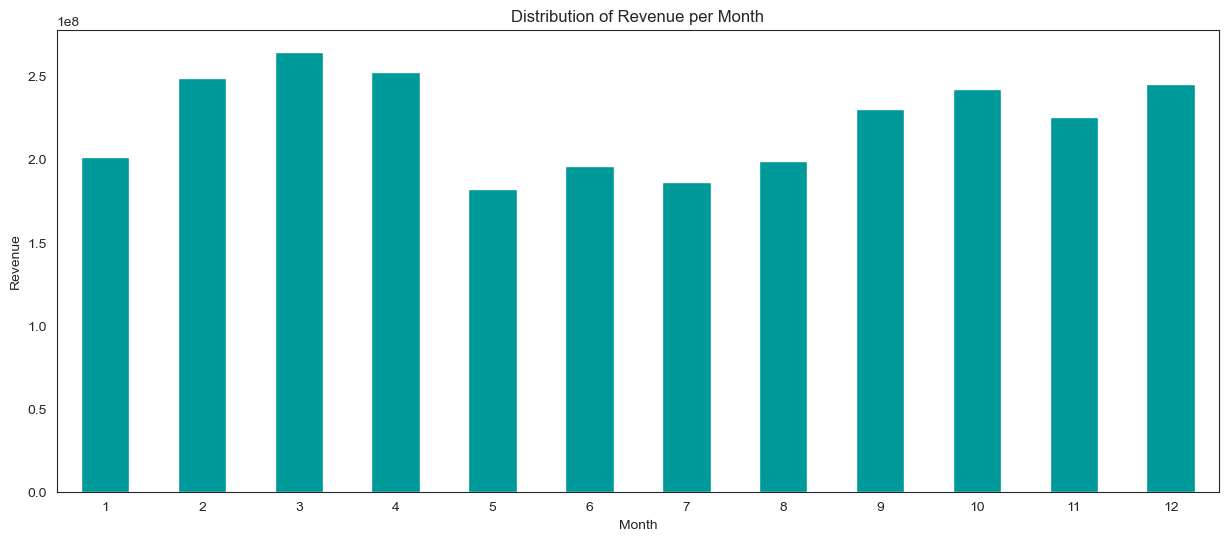

In [46]:
# plot the distribution of the revenue per month
plt.figure(figsize=(15, 6))
sales_data.groupby('Month')['Sales_EUR'].sum().plot(kind='bar', color=siemens_green)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue per Month')
plt.xticks(rotation=0)
plt.show()

***Revenue by year***
- Highest revenue year: 2021 with 773208458.97 EUR
- Lowest revenue year: 2018 with 141544018.09 EUR (only have 10 months in 2018)
- Average revenue per year is 534769060.13 EUR

In [48]:
# check the revenue distribution per year
sales_data.groupby('Year')['Sales_EUR'].sum()

Year
2018   141544018.0900
2019   756488260.5600
2020   737218879.3500
2021   773208458.9700
2022   265385683.7000
Name: Sales_EUR, dtype: float64

In [49]:
print(f'The year with the highest revenue is {sales_data.groupby("Year")["Sales_EUR"].sum().idxmax()}, with {sales_data.groupby("Year")["Sales_EUR"].sum().max():.2f} EUR.')
print(f'The year with the lowest revenue is {sales_data.groupby("Year")["Sales_EUR"].sum().idxmin()}, with {sales_data.groupby("Year")["Sales_EUR"].sum().min():.2f} EUR.')
print(f'The average revenue per year is {sales_data.groupby("Year")["Sales_EUR"].sum().mean():.2f} EUR.')

The year with the highest revenue is 2021, with 773208458.97 EUR.
The year with the lowest revenue is 2018, with 141544018.09 EUR.
The average revenue per year is 534769060.13 EUR.


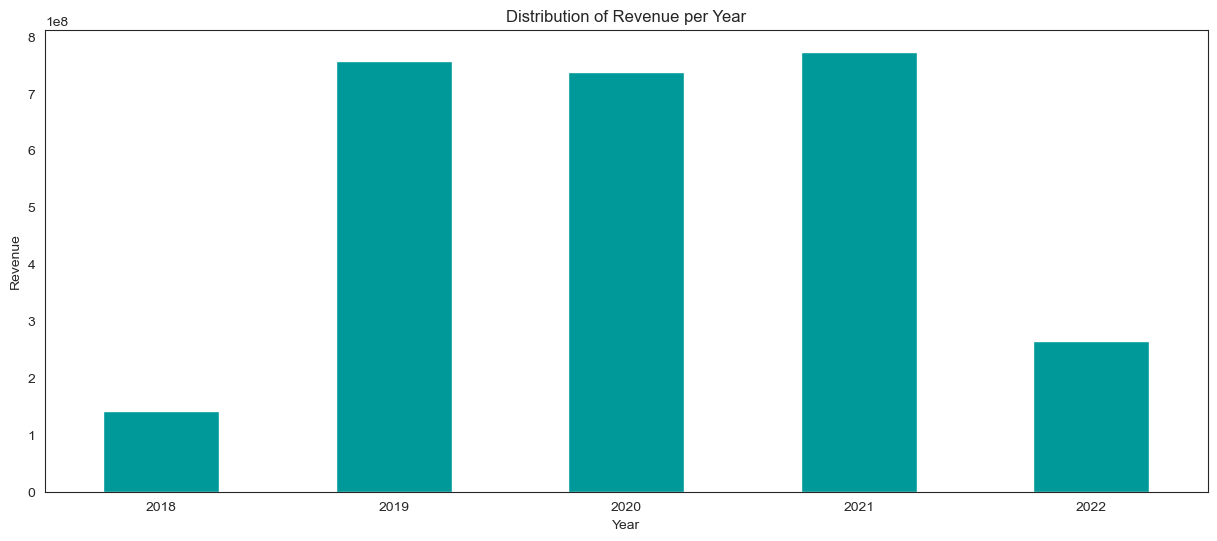

In [50]:
# plot the distribution of the revenue per year
plt.figure(figsize=(15, 6))
sales_data.groupby('Year')['Sales_EUR'].sum().plot(kind='bar', color=siemens_green)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue per Year')
plt.xticks(rotation=0)
plt.show()